<a href="https://colab.research.google.com/github/SarathiSoundarya/ML_A2implentation/blob/main/MCE_logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 2**<br />
Generate Test Datasets in Python with scikit-learn (sklearn), specifically to gener-
ate blobs of points with a Gaussian distribution (n_samples=10000, n_features=2,
centers=2, cluster_std=1.05, random_state=2). Use the Minimimum classified Error method and logistic regression to build two linear models to separate those
binary pair of points. Compare the performance of the MCE and logistic regression on both training and test sets and discuss how these two learning methods
differ.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

**Minimum Classification Error**<br />
The cost function to minimize is given as $E(w,b)=\sum_{i=1}^{n}l(-y_{i}(w\cdot x_{i}+b))$
where $l(x)=\frac{1}{1+e^{-x}}$ and the derivative is given by $l'(x)=l(x)(1-l(x))$.<br /> If the input to $l$ is negative and large then loss is minimum. The derivatives is given as 
$\frac{\partial E}{\partial w_{j}}=\sum_{i=1}^{N}l(-y_{i}(w\cdot x_{i}+b))(1-l(-y_{i}(w\cdot x_{i}+b))(-y_{i}x^{i}_{j})$<br />
$\frac{\partial E}{\partial b}=\sum_{i=1}^{N}l(-y_{i}(w\cdot x_{i}+b))(1-l(-y_{i}(w\cdot x_{i}+b))(-y_{i})$<br />
The update rule is given as<br
$w_{j}=w_{j}-\alpha \frac{\partial E}{\partial w_{j}}$<br />
$b=b-\alpha \frac{\partial E}{\partial b}$
<br />
Reference: Hui Jiang, ML Fundamentals<br />
THE BELOW CODE IS A VECTORIZED IMPLEMENTATION

In [2]:
def sigmoid(x):
    "Numerically stable sigmoid function."
    x=np.array(x,dtype=np.float128)
    z=np.where(x>=0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))
    #print(z)
    return z

In [3]:
class MCE:
   def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
   
   def update(self,dw,db):
      self.weights-=self.lr*dw
      self.bias-=self.lr*db
   
   def gradient_descent(self,x,y,y_pred):
      n_samples,n_features=x.shape
      dw=np.zeros((1,n_features))
      con=-y*y_pred
      prod=sigmoid(con)*(1-sigmoid(con))
      for i in range(n_features):
        dw[0][i]= np.sum(-prod*y*x.T[i])
      db=np.sum(-prod*y)
      return dw,db
   
   def fit(self, x, y, xtest, ytest):
     #initializations
     cost_list=[]
     accuracy=[]
     n_samples,n_features=x.shape
     y=np.where(y==0,-1,1)
     ytest=np.where(ytest==0,-1,1)
     ytest=ytest.reshape((1,xtest.shape[0]))
     self.weights=np.random.rand(1,n_features)*0.01
     for i in range(self.n_iters):
       #gradient descent and updation
        y_predict=np.dot(self.weights,x.T)+self.bias
        cost=(1/2*n_samples)*(np.sum(np.square(y-y_predict)))
        dw,db=self.gradient_descent(x,y,y_predict)
        self.update(dw,db)

        #plotting at every 100th iteration 
        if(i%100==0):
          a_max = np.amax(x[:,0])
          a_min = np.amin(x[:,0])
          xpts = np.linspace(a_min,a_max)
          ypts = -(self.weights[0][0]*xpts + self.bias)/self.weights[0][1]
          ax.plot(xpts, ypts,label=i)
          plt.legend()
          
          #testing the accuracy on the test data
          y_p=np.dot(self.weights,xtest.T)+self.bias
          y_p=np.where(y_p>0,1,-1)
          acc=np.count_nonzero(ytest==y_p)/xtest.shape[0]
        accuracy.append(acc)
        cost_list.append(cost)
      
     return cost_list,accuracy


**Logistic Regression**<br />
The joint
probability of making a correct classification for all samples in the training set is $L(w)=\prod_{i=1}^{N}l(y_{i}(w\cdot x_{i}+b))$<br />
Logistic regression aims to learn a linear model w to maximize the joint
probability of correct classification. Because the logarithm is a monotonic
function, it is equivalent to maximizing the log loss function<br />
$E(w,b)=ln L(w)=\sum_{i=1}^{N}ln(l(y_{i}(w\cdot x_{i}+b)))$<br />
or minimizing<br />
$E(w,b)=ln L(-w)=\sum_{i=1}^{N}ln(l(-y_{i}(w\cdot x_{i}+b)))$<br />
The derivatives is given as <br />
$\frac{\partial E}{\partial w_{j}}=\sum_{i=1}^{N}(1-l(-y_{i}(w\cdot x_{i}+b))(-y_{i}x^{i}_{j})$<br />
$\frac{\partial E}{\partial b}=\sum_{i=1}^{N}(1-l(-y_{i}(w\cdot x_{i}+b))(-y_{i})$<br />
The update rule is given as<br />
$w_{j}=w_{j}-\alpha \frac{\partial E}{\partial w_{j}}$<br />
$b=b-\alpha \frac{\partial E}{\partial b}$<br />
Reference: Hui Jiang, ML Fundamentals

In [4]:
class Logreg:
   def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
   
   def update(self,dw,db):
      self.weights-=self.lr*dw
      self.bias-=self.lr*db
   
   def gradient_descent(self,x,y,y_pred):
      n_samples,n_features=x.shape
      dw=np.zeros((1,n_features))
      con=-y*y_pred
      prod=1-sigmoid(-con)
      for i in range(n_features):
        dw[0][i]= np.sum(-prod*y*x.T[i])
      db=np.sum(-prod*y)
      return dw,db
   
   def fit(self, x, y, xtest, ytest):
     #initializations
     cost_list=[]
     accuracy=[]
     n_samples,n_features=x.shape
     y=np.where(y==0,-1,1)
     ytest=np.where(ytest==0,-1,1)
     ytest=ytest.reshape((1,xtest.shape[0]))
     self.weights=np.random.rand(1,n_features)*0.01
     for i in range(self.n_iters):
       #gradient descent and updation
        y_predict=np.dot(self.weights,x.T)+self.bias
        cost=(1/2*n_samples)*(np.sum(np.square(y-y_predict)))
        dw,db=self.gradient_descent(x,y,y_predict)
        self.update(dw,db)

        #plotting at every 100th iteration 
        if(i%100==0):
          a_max = np.amax(x[:,0])
          a_min = np.amin(x[:,0])
          xpts = np.linspace(a_min,a_max)
          ypts = -(self.weights[0][0]*xpts + self.bias)/self.weights[0][1]
          ax.plot(xpts, ypts,label=i)
          plt.legend()
          
          #testing the accuracy on the test data
          y_p=np.dot(self.weights,xtest.T)+self.bias
          y_p=np.where(y_p>0,1,-1)
          acc=np.count_nonzero(ytest==y_p)/xtest.shape[0]
        accuracy.append(acc)
        cost_list.append(cost)
      
     return cost_list,accuracy


COST LIST, WEIGHTS AND ACUURACY FOR MCE
weights,bias: [[0.85307795 2.04049968]] 10.933516540962915768
final cost, accuracy: 24109966.15968332 1.0


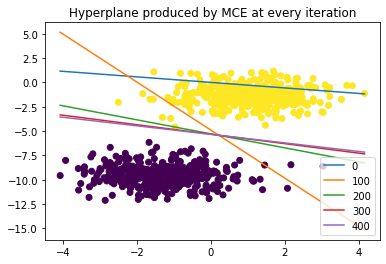

COST LIST, WEIGHTS AND ACUURACY FOR LOGISTIC REGRESSION
weights,bias: [[0.79669856 2.21452332]] 12.0208909070890453165
final cost, accuracy: 27916341.46253278 1.0


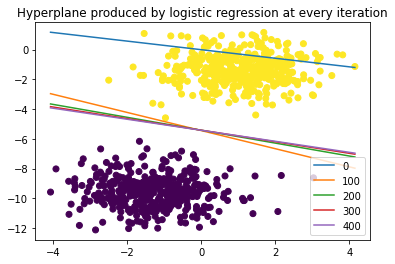

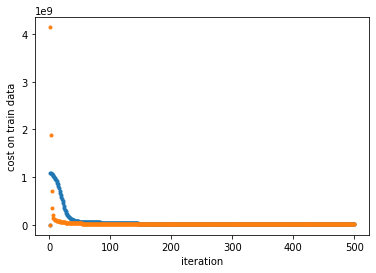

In [5]:
x,y=datasets.make_blobs(n_samples=1000, n_features=2,centers=2, cluster_std=1.05, random_state=2)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# MINIMUM CLASSIFICATION ERROR
minc=MCE(0.01,500)
#plotting
fig, ax = plt.subplots()
plt.scatter(xtrain[:,0], xtrain[:,1],marker="o", c=ytrain)

#mce fit
cost_list_mce,accuracy_mce=minc.fit(xtrain,ytrain,xtest,ytest)
print('COST LIST, WEIGHTS AND ACUURACY FOR MCE')
print("weights,bias:",minc.weights,minc.bias)
print('final cost, accuracy:',cost_list_mce[-1],accuracy_mce[-1])

#plot the hyperplane
plt.title('Hyperplane produced by MCE at every iteration')
plt.show()

#LOGISTIC REGRESSION
loreg=Logreg(0.01,500)
#plotting
fig, ax = plt.subplots()
plt.scatter(xtrain[:,0], xtrain[:,1],marker="o", c=ytrain)

#logreg fit
cost_list_lr,accuracy_lr=loreg.fit(xtrain,ytrain,xtest,ytest)
print('COST LIST, WEIGHTS AND ACUURACY FOR LOGISTIC REGRESSION')
print("weights,bias:",loreg.weights,loreg.bias)
print('final cost, accuracy:',cost_list_lr[-1],accuracy_lr[-1])

#plot the hyperplane
plt.title('Hyperplane produced by logistic regression at every iteration')
plt.show()

fig, ax = plt.subplots()

#PLOTTING THE COSTS AND THE ACCURACY FOR MCE AND LOGISTIC REGRESSION
iterations=np.linspace(1,minc.n_iters,minc.n_iters)
ax.plot(iterations,cost_list_mce,'.',label='MCE')
ax.plot(iterations,cost_list_lr,'.',label='Logistic Regression')
plt.xlabel('iteration')
plt.ylabel('cost on train data')
plt.show()
#observe that the cost increases after certain iterations because it starts overfitting the training data


Comparing the greadients, the MCE learning focuses more on the boundary cases, where $|y_{i}wx_{i}|$ is close to 0, because only the training samples near the decision boundary generate large gradients.<br />
On the other hand,
the gradient weights of the logistic regression (in blue) show that the logistic regression generates significant gradients for all misclassified samples.<br />
Refer page 115 in HUI JIANG
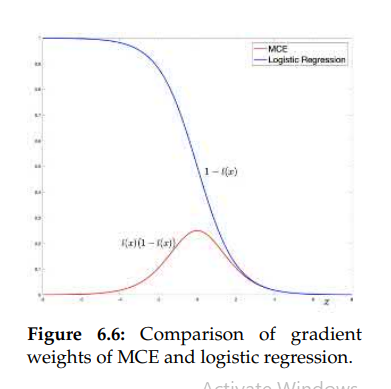
<br />For misclassification, $l(-y_{i}wx_{i})$ is very small hence $1-l(-y_{i}wx_{i})$ is very large, so the gradient associated with it is also very large.